Classification Model



Contents

1. Explore the data:

We have found that the MICs are discrete multiples of 2.
Thus we can interpret the problem in terms of classification.

2. The classification model

Include check points to automatically save only the best model.
We use the best recorded model for evaluations.
https://machinelearningmastery.com/check-point-deep-learning-models-keras/


Tasks

1. Try more k-mears.

We are working with 4-mers but we want to go to 10-mers.

2. Try unbalanced class approach.

With raw approach we find decent results.
https://towardsdatascience.com/handling-class-imbalanced-data-using-a-loss-specifically-made-for-it-6e58fd65ffab

3. Try to comput the accuracy considering +/- 1 2-fold 

Reproduce the Fig. 3 of the paper.
https://jcm.asm.org/content/57/2/e01260-18/figures-only

4. Try CNN-1D, specially when we use the 10-mers since the number of bins is going to increase a lot.


In [3]:
import pandas as pd
import numpy as np

# MIC values in a 1 2-fold dilution step (or 1 2-fold dilution factor)
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Keras classification model
from keras.layers.convolutional import Conv1D
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout    
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [4]:
# 4-mers Spectrum- MIC-Matrix

matrix = pd.read_csv('tetramers_mics_matrix.csv', index_col=0)

matrix

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,nalidixic acid,ampicillin,sulfisoxazole,cefoxitin,tetracycline,ceftiofur,amoxicillin/clavulanic acid,streptomycin,azithromycin,kanamycin
0,0.010195,0.009592,0.009397,0.010176,0.007437,0.007577,0.010206,0.005423,0.006263,0.008236,...,4.0,1.0,16.0,4.0,32.0,0.5,1.0,8.0,8.0,NaN
1,0.010449,0.009637,0.009843,0.010463,0.007509,0.007464,0.010087,0.005524,0.006698,0.008495,...,4.0,1.0,256.0,4.0,32.0,1.0,1.0,64.0,8.0,NaN
2,0.010097,0.009737,0.009135,0.010075,0.007710,0.007822,0.010148,0.005425,0.006208,0.008100,...,4.0,1.0,32.0,4.0,32.0,0.5,1.0,4.0,8.0,NaN
3,0.010247,0.009551,0.009677,0.010202,0.007336,0.007510,0.010134,0.005421,0.006495,0.008521,...,4.0,1.0,32.0,4.0,32.0,1.0,1.0,8.0,8.0,NaN
4,0.010307,0.009660,0.009587,0.010329,0.007443,0.007574,0.010206,0.005528,0.006474,0.008381,...,32.0,1.0,64.0,2.0,4.0,0.5,1.0,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,0.009980,0.009666,0.009202,0.009970,0.007589,0.007733,0.010247,0.005414,0.006218,0.008093,...,4.0,1.0,32.0,2.0,32.0,1.0,1.0,4.0,8.0,NaN
1933,0.010330,0.009561,0.009833,0.010424,0.007569,0.007630,0.009912,0.005661,0.006756,0.008575,...,4.0,32.0,256.0,16.0,32.0,8.0,32.0,64.0,4.0,NaN
1934,0.010122,0.009620,0.009437,0.010167,0.007503,0.007677,0.010154,0.005604,0.006500,0.008380,...,4.0,32.0,256.0,32.0,32.0,8.0,32.0,64.0,4.0,64.0
1935,0.010025,0.009611,0.009521,0.010214,0.007612,0.007600,0.010122,0.005471,0.006532,0.008427,...,4.0,32.0,256.0,32.0,32.0,8.0,32.0,4.0,4.0,NaN


Text(0, 0.5, 'Amount of genomes')

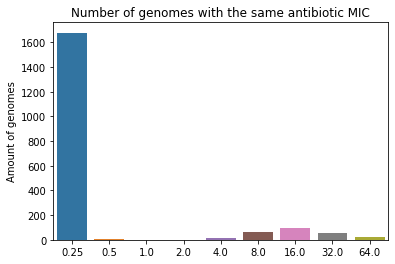

In [5]:
# Bar chart showing the number of genomes with the same antibiotic MIC values

# List of unique MIC values without NaN values
mic_values = matrix['ceftriaxone'].loc[matrix['ceftriaxone']>0].sort_values().unique()

# Number of genomes with the same antibiotic MIC
amount = [len(matrix.loc[matrix['ceftriaxone']==mic]) for mic in mic_values]

# Set the width and height of the figure
plt.figure(figsize=(6,4))

# Add title
plt.title("Number of genomes with the same antibiotic MIC")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=mic_values, y=amount)

# Add label for vertical axis
plt.ylabel("Amount of genomes")

In [38]:
# Number of genomes with the same MIC, by antibiotic.

antibiotics = matrix.columns[-15:]
amounts = []
for antibiotic in antibiotics:
    mic_values = matrix[antibiotic].loc[matrix[antibiotic]>0].sort_values().unique()
    amount = []
    for mic in mic_values:
        amount.append(len(matrix.loc[matrix[antibiotic]==mic]))
    amounts.append(pd.DataFrame(np.reshape(amount, (1,-1)), columns=mic_values))
amounts_dframe = amounts[0].append(amounts[1:15], sort=False, ignore_index=True)

print(amounts[0])
print(amounts[1])
amounts_dframe

   0.25   0.50   1.00   2.00   4.00   8.00   16.00  32.00  64.00
0   1678      5      1      1     14     67     93     57     21
   0.120  0.125  0.250  0.500  1.000  2.000  4.000
0   1091    660    140      9      2      1     34


,0.015,0.030,0.060,0.120,0.125,0.250,0.500,1.000,2.000,4.000,8.000,16.000,32.000,64.000,128.000,256.000
0,NaN,NaN,NaN,NaN,NaN,1678.0,5.0,1.0,1.0,14.0,67.0,93.0,57.0,21.0,NaN,NaN
1,NaN,NaN,NaN,1091.0,660.0,140.0,9.0,2.0,1.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1596.0,299.0,10.0,NaN,5.0,6.0,17.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,430.0,1078.0,198.0,11.0,4.0,20.0,196.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,672.0,1113.0,43.0,93.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,545.0,1328.0,26.0,15.0,19.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1246.0,182.0,8.0,NaN,2.0,499.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,713.0,283.0,17.0,649.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,836.0,700.0,108.0,43.0,209.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769.0,6.0,6.0,1156.0,NaN,NaN,NaN


Text(0.5, 33.0, 'Antibiotic MIC (micrograms per milliliter)')

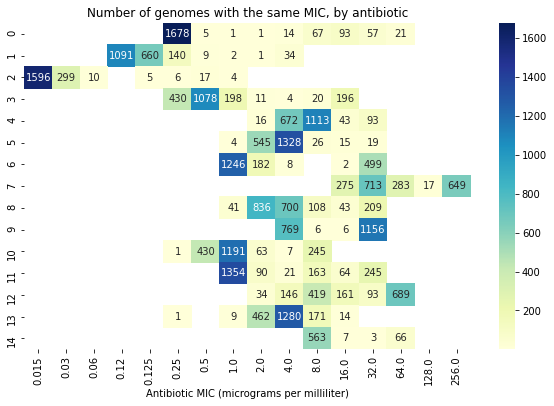

In [7]:
# Heatmap showing the number of genomes with the same MIC, by antibiotic.

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of genomes with the same MIC, by antibiotic")

# Heatmap showing the amount of genomes with the same MIC for each MIC, by antibiotic
sns.heatmap(data=amounts_dframe, annot=True,fmt='.4g',cmap="YlGnBu")

# Add label for horizontal axis
plt.xlabel("Antibiotic MIC (micrograms per milliliter)")

In [47]:
# Atibiotic
antibiotic = 'ceftriaxone'
# list of unique mic values (leaving nan values)
mic_values_uniq = matrix[antibiotic].loc[matrix[antibiotic]>0].sort_values().unique()
# list of MIC values
mic_values = matrix[antibiotic].loc[matrix[antibiotic]>0].values
# by definition we need to reshape the list of mics
mic_reshape = np.reshape(mic_values,(-1,1))
# define encoder function
encoder = OneHotEncoder(sparse=False)
# transform data from numerical cat to onehot code
mic_onehot = encoder.fit_transform(mic_reshape)

In [50]:
# A two-fold dilution reduces the concentration of a solution
# by a factor of two that is reduces the original concentration by one half. 
# A series of two-fold dilutions is described as two-fold serial dilutions.

# The accuracy within +/-1 2-fold dilution step of the laboratory-derived MIC.

# The utility of AMR diagnostic devices is often described in terms of error rate. Major
# errors (MEs) are defined as susceptible genomes that have been incorrectly assigned
# resistant MICs by the model. Very major errors (VMEs) are defined as resistant genomes
# that have been incorrectly assigned susceptible MICs by the model. FDA standards for
# automated systems recommend a major error rate of < 3% (54). All antibiotics used in
# the model had ME rates within this range (Table 2). The FDA standards for VME rates
# indicate that the lower 95% confidence limit should be < 1.5% and that the upper limit
# should be <7.5%

AttributeError: 'OneHotEncoder' object has no attribute 'active_features_'

In [ ]:
# Define the features input (X) and the target output (y) variables
X = matrix.loc[matrix[antibiotic]>0].values[:,0:136]
y = mic_onehot
# Split into the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [9]:
# We standardize the input samples
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [29]:
# Neural Network for classification

# If we use more and more layers we get overfit, so we have to balance the network. 
# Anyway, during training we always save the best model only,
# so if there is overfit we just save the best one

model = Sequential()
model.add(Dense(64, input_shape=(136, ), activation='relu', name='input'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(mic_onehot.shape[1], activation='softmax', name='output'))

In [30]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# We fit with a validation method in order to test overfit, also we checkpoint the best model for later test

# Overvit can be found when the train loss is small but validation loss is big

filepath="cnn_class_mic.h5"
earlystopper = EarlyStopping(monitor='val_loss', patience=50, verbose=1, min_delta=1e-7)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=20, min_lr=0.000000001)
callbacks=[reduce_lr, checkpoint, earlystopper]

In [32]:
history = model.fit(X_train, y_train, epochs=4000, batch_size=128, validation_split=0.3, callbacks=callbacks)

Epoch 1/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.9822 - accuracy: 0.4219
Epoch 00001: val_loss improved from inf to 1.42730, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 19ms/step - loss: 1.7601 - accuracy: 0.5656 - val_loss: 1.4273 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 2/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.3426 - accuracy: 0.7734
Epoch 00002: val_loss improved from 1.42730 to 0.80049, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.1493 - accuracy: 0.8098 - val_loss: 0.8005 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 3/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7259 - accuracy: 0.8828
Epoch 00003: val_loss improved from 0.80049 to 0.66501, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 9ms/step - loss: 0.8762 - accuracy: 0.8680 - val_loss: 0.6650 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 4/4000
 1/10 [==

Epoch 27/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3533 - accuracy: 0.8828
Epoch 00027: val_loss did not improve from 0.51570
10/10 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.8697 - val_loss: 0.5178 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 28/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3852 - accuracy: 0.8594
Epoch 00028: val_loss did not improve from 0.51570
10/10 [==============================] - 0s 5ms/step - loss: 0.4015 - accuracy: 0.8697 - val_loss: 0.5264 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 29/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4066 - accuracy: 0.8438
Epoch 00029: val_loss did not improve from 0.51570
10/10 [==============================] - 0s 5ms/step - loss: 0.3952 - accuracy: 0.8697 - val_loss: 0.5353 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 30/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.8516
Epoch 00030: val_loss did not imp

Epoch 55/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.8516
Epoch 00055: val_loss did not improve from 0.51570
10/10 [==============================] - 0s 5ms/step - loss: 0.2910 - accuracy: 0.8746 - val_loss: 0.7320 - val_accuracy: 0.8662 - lr: 5.0000e-04
Epoch 56/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8359
Epoch 00056: val_loss did not improve from 0.51570
10/10 [==============================] - 0s 5ms/step - loss: 0.2872 - accuracy: 0.8754 - val_loss: 0.7258 - val_accuracy: 0.8662 - lr: 5.0000e-04
Epoch 57/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3926 - accuracy: 0.8438
Epoch 00057: val_loss did not improve from 0.51570
10/10 [==============================] - 0s 5ms/step - loss: 0.2907 - accuracy: 0.8762 - val_loss: 0.7467 - val_accuracy: 0.8662 - lr: 5.0000e-04
Epoch 58/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8984
Epoch 00058: val_loss

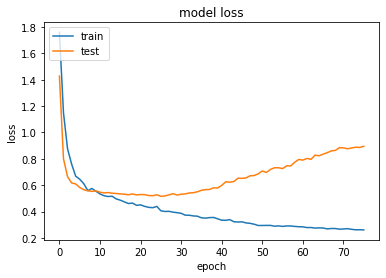

In [33]:
# Now, we can visualize the history of the model fit 
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
# Load the best model and test the predictions.
model_from_file = load_model(filepath)

In [46]:
print(y_train[:10])
pred = model_from_file.predict(X_train[:10])
print(np.round_(pred, decimals = 2))

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.96 0.   0.   0.   0.   0.01 0.01 0.02 0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.95 0.   0.   0.   0.   0.01 0.02 0.02 0.  ]
 [0.77 0.   0.01 0.   0.01 0.05 0.09 0.06 0.01]
 [0.31 0.05 0.06 0.03 0.06 0.12 0.16 0.13 0.07]
 [0.97 0.   0.   0.   0.   0.   0.01 0.01 0.  ]
 [0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.98 0.   0.   0.   0.   0.   0.01 0.01 0.  ]
 [0.97 0.   0.   0.   0.   0.01 0.01 0.01 0.  ]]


In [35]:
# concat X_test and y_test
pd.DataFrame(X_test)
pd.DataFrame(y_test)
test_data = pd.concat([pd.DataFrame(X_test),pd.DataFrame(mic_reshape)], axis=1, join='inner')
test_data_enc = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test)], axis=1, join='inner')
    
accuracy = []
for mic in mic_values_uniq:
    X_test_class = test_data.loc[test_data.iloc[:,136]==mic].iloc[:,0:136].to_numpy()
    if len(X_test_class)!=0:
        y_test_class = test_data_enc.loc[test_data.iloc[:,136]==mic].iloc[:,136:145].to_numpy()
        scores = model_from_file.evaluate(X_test_class, y_test_class, verbose=0)
        accuracy.append(scores[1])
    else:
        accuracy.append(0)
        
accuracy

[0.8707864880561829, 0, 0, 0, 0, 0, 0.1666666716337204, 0.75, 1.0]

Text(0, 0.5, 'Accuracy')

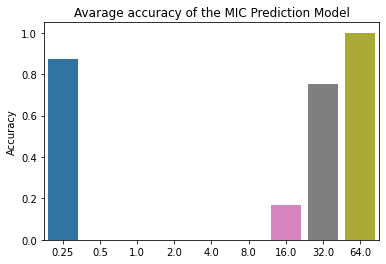

In [37]:
# Bar chart showing the number of genomes with the same antibiotic MIC values

# Set the width and height of the figure
plt.figure(figsize=(6,4))

# Add title
plt.title("Avarage accuracy of the MIC Prediction Model")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=mic_values, y=accuracy)

# Add label for vertical axis
plt.ylabel("Accuracy")

In [231]:
# ROC plot

from sklearn.metrics import roc_curve
y_test_flat = y_test.flatten()
y_pred_flat = model.predict(X_test).flatten()

print(y_test_flat[:20])
print(np.round_(y_pred_flat[:20], decimals = 2))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test.flat, y_pred_flat)

[0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
[0.02 0.04 0.   0.   0.94 0.19 0.55 0.27 0.   0.   0.   0.   0.   0.
 1.   0.17 0.56 0.27 0.   0.  ]


In [232]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

0.8702572005526624


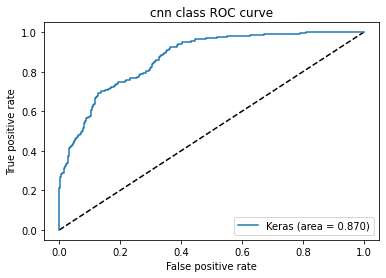

In [233]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('cnn class ROC curve')
plt.legend(loc='best')
plt.show()

In [239]:
# evaluate the model
scores = model_from_file.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f" % (model_from_file.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model_from_file.metrics_names[1], scores[1]*100))

loss: 0.81
accuracy: 67.30%


In [240]:
# evaluate the model
scores = model_from_file.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f" % (model_from_file.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model_from_file.metrics_names[1], scores[1]*100))

loss: 1.04
accuracy: 57.22%


In [592]:
# Avarage accuracy within +/-1 2 fold dilution step, by antibiotic

# List of antibiotics
antibiotics = matrix.columns[-15:]

accuracies = []
for antibiotic in antibiotics:
    # list of unique mic values (leaving nan values)
    mic_values_uniq = matrix[antibiotic].loc[matrix[antibiotic]>0].sort_values().unique()
    # list of MIC values
    mic_values = matrix[antibiotic].loc[matrix[antibiotic]>0].values
    # by definition we need to reshape the list of mics
    mic_reshape = np.reshape(mic_values,(-1,1))
    # define encoder function
    encoder = OneHotEncoder(sparse=False)
    # transform data from numerical cat to onehot code
    mic_onehot = encoder.fit_transform(mic_reshape)
    # Define the features input (X) and the target output (y) variables
    X = matrix.loc[matrix[antibiotic]>0].values[:,0:136]
    y = mic_onehot
    # Split into the training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
 
    # We standardize the input samples
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train - mean)/std
    X_test = (X_test - mean)/std
    
    # The model
    model = Sequential()
    model.add(Dense(64, input_shape=(136, ), activation='relu', name='input'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(mic_onehot.shape[1], activation='softmax', name='output'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    filepath="cnn_class_mic.h5"
    earlystopper = EarlyStopping(monitor='val_loss', patience=50, verbose=1, min_delta=1e-7)
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=20, min_lr=0.000000001)
    callbacks=[reduce_lr, checkpoint, earlystopper]
    history = model.fit(X_train, y_train, epochs=4000, batch_size=128, validation_split=0.3, callbacks=callbacks)
    model_from_file = load_model(filepath)
    
    # concat X_test and y_test
    pd.DataFrame(X_test)
    pd.DataFrame(y_test)
    test_data = pd.concat([pd.DataFrame(X_test),pd.DataFrame(mic_reshape)], axis=1, join='inner')
    test_data_enc = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test)], axis=1, join='inner')
    
    accuracy = []
    for mic in mic_values_uniq:
        X_test_class = test_data.loc[test_data.iloc[:,136]==mic].iloc[:,0:136].to_numpy()
        if len(X_test_class)!=0:
            y_test_class = test_data_enc.loc[test_data.iloc[:,136]==mic].iloc[:,136:145].to_numpy()
            scores = model_from_file.evaluate(X_test_class, y_test_class, verbose=0)
            accuracy.append(scores[1])
        else:
            accuracy.append(0)
    accuracies.append(pd.DataFrame(np.reshape(accuracy, (1,-1)), columns=mic_values_uniq))

Epoch 1/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.9802 - accuracy: 0.3359
Epoch 00001: val_loss improved from inf to 1.40990, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 30ms/step - loss: 1.7445 - accuracy: 0.5697 - val_loss: 1.4099 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 2/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.2172 - accuracy: 0.8594
Epoch 00002: val_loss improved from 1.40990 to 0.83855, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 9ms/step - loss: 1.1071 - accuracy: 0.8451 - val_loss: 0.8385 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 3/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.1970 - accuracy: 0.8438
Epoch 00003: val_loss improved from 0.83855 to 0.68873, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.9036 - accuracy: 0.8689 - val_loss: 0.6887 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 4/4000
 1/10 [==

Epoch 55/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.8906
Epoch 00055: val_loss did not improve from 0.51382
10/10 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.8738 - val_loss: 0.6691 - val_accuracy: 0.8795 - lr: 5.0000e-04
Epoch 56/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.8828
Epoch 00056: val_loss did not improve from 0.51382
10/10 [==============================] - 0s 6ms/step - loss: 0.3025 - accuracy: 0.8779 - val_loss: 0.6841 - val_accuracy: 0.8795 - lr: 5.0000e-04
Epoch 57/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.9062
Epoch 00057: val_loss did not improve from 0.51382
10/10 [==============================] - 0s 5ms/step - loss: 0.2900 - accuracy: 0.8811 - val_loss: 0.6951 - val_accuracy: 0.8776 - lr: 5.0000e-04
Epoch 58/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8750
Epoch 00058: val_loss

Epoch 8/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0818 - accuracy: 0.5156
Epoch 00008: val_loss improved from 1.00332 to 0.97795, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 9ms/step - loss: 1.1042 - accuracy: 0.5238 - val_loss: 0.9779 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 9/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.1179 - accuracy: 0.5156
Epoch 00009: val_loss improved from 0.97795 to 0.94867, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.0648 - accuracy: 0.5410 - val_loss: 0.9487 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 10/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.1110 - accuracy: 0.5156
Epoch 00010: val_loss improved from 0.94867 to 0.93097, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.0415 - accuracy: 0.5410 - val_loss: 0.9310 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 11/4000
 1/1

Epoch 34/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.7578
Epoch 00034: val_loss improved from 0.79979 to 0.79669, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.7295 - accuracy: 0.6910 - val_loss: 0.7967 - val_accuracy: 0.6902 - lr: 0.0010
Epoch 35/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6763 - accuracy: 0.7500
Epoch 00035: val_loss did not improve from 0.79669
10/10 [==============================] - 0s 6ms/step - loss: 0.7390 - accuracy: 0.6984 - val_loss: 0.8023 - val_accuracy: 0.6692 - lr: 0.0010
Epoch 36/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7262 - accuracy: 0.6797
Epoch 00036: val_loss did not improve from 0.79669
10/10 [==============================] - 0s 5ms/step - loss: 0.7040 - accuracy: 0.6869 - val_loss: 0.7978 - val_accuracy: 0.6922 - lr: 0.0010
Epoch 37/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7154 - accuracy: 0.

Epoch 62/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4930 - accuracy: 0.7891
Epoch 00062: val_loss did not improve from 0.78633
10/10 [==============================] - 0s 6ms/step - loss: 0.5279 - accuracy: 0.7943 - val_loss: 0.8430 - val_accuracy: 0.6902 - lr: 0.0010
Epoch 63/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5781 - accuracy: 0.7969
Epoch 00063: val_loss did not improve from 0.78633
10/10 [==============================] - 0s 5ms/step - loss: 0.5263 - accuracy: 0.7943 - val_loss: 0.9016 - val_accuracy: 0.7036 - lr: 0.0010
Epoch 64/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6472 - accuracy: 0.7109
Epoch 00064: val_loss did not improve from 0.78633
10/10 [==============================] - 0s 5ms/step - loss: 0.5289 - accuracy: 0.7787 - val_loss: 0.8331 - val_accuracy: 0.7094 - lr: 0.0010
Epoch 65/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4772 - accuracy: 0.8047
Epoch 00065: val_loss did not imp

Epoch 90/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3108 - accuracy: 0.8906
Epoch 00090: val_loss did not improve from 0.78633
10/10 [==============================] - 0s 9ms/step - loss: 0.3851 - accuracy: 0.8566 - val_loss: 1.0226 - val_accuracy: 0.7055 - lr: 2.5000e-04
Epoch 91/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.9062
Epoch 00091: val_loss did not improve from 0.78633
10/10 [==============================] - 0s 7ms/step - loss: 0.3648 - accuracy: 0.8672 - val_loss: 1.0105 - val_accuracy: 0.7132 - lr: 2.5000e-04
Epoch 92/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8672
Epoch 00092: val_loss did not improve from 0.78633
10/10 [==============================] - 0s 6ms/step - loss: 0.3669 - accuracy: 0.8582 - val_loss: 1.0093 - val_accuracy: 0.7170 - lr: 2.5000e-04
Epoch 93/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3761 - accuracy: 0.8438
Epoch 00093: val_loss

Epoch 19/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5177 - accuracy: 0.8047
Epoch 00019: val_loss did not improve from 0.57849
10/10 [==============================] - 0s 6ms/step - loss: 0.5129 - accuracy: 0.8213 - val_loss: 0.5826 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 20/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5048 - accuracy: 0.8125
Epoch 00020: val_loss did not improve from 0.57849
10/10 [==============================] - 0s 6ms/step - loss: 0.5106 - accuracy: 0.8221 - val_loss: 0.5819 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 21/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4538 - accuracy: 0.8516
Epoch 00021: val_loss did not improve from 0.57849
10/10 [==============================] - 0s 6ms/step - loss: 0.5139 - accuracy: 0.8221 - val_loss: 0.5795 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 22/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5961 - accuracy: 0.8047
Epoch 00022: val_loss improved fr

Epoch 47/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4737 - accuracy: 0.7812
Epoch 00047: val_loss did not improve from 0.56515
10/10 [==============================] - 0s 5ms/step - loss: 0.3713 - accuracy: 0.8467 - val_loss: 0.5776 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 48/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5689 - accuracy: 0.7422
Epoch 00048: val_loss did not improve from 0.56515
10/10 [==============================] - 0s 6ms/step - loss: 0.3653 - accuracy: 0.8352 - val_loss: 0.5827 - val_accuracy: 0.8547 - lr: 0.0010
Epoch 49/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8594
Epoch 00049: val_loss did not improve from 0.56515
10/10 [==============================] - 0s 5ms/step - loss: 0.3578 - accuracy: 0.8459 - val_loss: 0.6108 - val_accuracy: 0.8509 - lr: 0.0010
Epoch 50/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8828
Epoch 00050: val_loss did not imp

Epoch 75/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2381 - accuracy: 0.8984
Epoch 00075: val_loss did not improve from 0.56515
10/10 [==============================] - 0s 5ms/step - loss: 0.2250 - accuracy: 0.9148 - val_loss: 0.7975 - val_accuracy: 0.8203 - lr: 5.0000e-04
Epoch 76/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.9062
Epoch 00076: val_loss did not improve from 0.56515
10/10 [==============================] - 0s 6ms/step - loss: 0.2307 - accuracy: 0.9164 - val_loss: 0.7935 - val_accuracy: 0.8260 - lr: 5.0000e-04
Epoch 77/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2154 - accuracy: 0.8984
Epoch 00077: val_loss did not improve from 0.56515
10/10 [==============================] - 0s 5ms/step - loss: 0.2064 - accuracy: 0.9221 - val_loss: 0.8188 - val_accuracy: 0.8260 - lr: 5.0000e-04
Epoch 78/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2110 - accuracy: 0.8984
Epoch 00078: val_loss

Epoch 10/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.2504 - accuracy: 0.6172
Epoch 00010: val_loss improved from 1.42648 to 1.38364, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 7ms/step - loss: 1.3436 - accuracy: 0.5508 - val_loss: 1.3836 - val_accuracy: 0.5335 - lr: 0.0010
Epoch 11/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.2283 - accuracy: 0.6094
Epoch 00011: val_loss improved from 1.38364 to 1.33677, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.2832 - accuracy: 0.5574 - val_loss: 1.3368 - val_accuracy: 0.5335 - lr: 0.0010
Epoch 12/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.3333 - accuracy: 0.5156
Epoch 00012: val_loss improved from 1.33677 to 1.29785, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.2374 - accuracy: 0.5451 - val_loss: 1.2978 - val_accuracy: 0.5335 - lr: 0.0010
Epoch 13/4000
 1

Epoch 63/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7748 - accuracy: 0.6875
Epoch 00063: val_loss did not improve from 1.11769
10/10 [==============================] - 0s 6ms/step - loss: 0.7827 - accuracy: 0.6713 - val_loss: 1.1860 - val_accuracy: 0.6004 - lr: 5.0000e-04
Epoch 64/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7899 - accuracy: 0.6484
Epoch 00064: val_loss did not improve from 1.11769
10/10 [==============================] - 0s 7ms/step - loss: 0.7808 - accuracy: 0.6697 - val_loss: 1.1732 - val_accuracy: 0.6042 - lr: 5.0000e-04
Epoch 65/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.8411 - accuracy: 0.6328
Epoch 00065: val_loss did not improve from 1.11769
10/10 [==============================] - 0s 9ms/step - loss: 0.7585 - accuracy: 0.6615 - val_loss: 1.2094 - val_accuracy: 0.5966 - lr: 5.0000e-04
Epoch 66/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.8904 - accuracy: 0.6016
Epoch 00066: val_loss

Epoch 91/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6810 - accuracy: 0.7266
Epoch 00091: val_loss did not improve from 1.11769
10/10 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 0.6984 - val_loss: 1.3216 - val_accuracy: 0.6061 - lr: 2.5000e-04
Epoch 92/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.7031
Epoch 00092: val_loss did not improve from 1.11769
10/10 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.6926 - val_loss: 1.3386 - val_accuracy: 0.6023 - lr: 2.5000e-04
Epoch 00092: early stopping
Epoch 1/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.8727 - accuracy: 0.1953
Epoch 00001: val_loss improved from inf to 1.53100, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 19ms/step - loss: 1.6710 - accuracy: 0.2361 - val_loss: 1.5310 - val_accuracy: 0.3537 - lr: 0.0010
Epoch 2/4000
 1/10 [==>...........................] - ETA: 0

 1/10 [==>...........................] - ETA: 0s - loss: 0.5359 - accuracy: 0.8047
Epoch 00051: val_loss did not improve from 0.72573
10/10 [==============================] - 0s 5ms/step - loss: 0.5703 - accuracy: 0.7656 - val_loss: 0.7688 - val_accuracy: 0.6998 - lr: 0.0010
Epoch 52/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6520 - accuracy: 0.7344
Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00052: val_loss did not improve from 0.72573
10/10 [==============================] - 0s 6ms/step - loss: 0.5804 - accuracy: 0.7623 - val_loss: 0.7752 - val_accuracy: 0.7094 - lr: 0.0010
Epoch 53/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7812
Epoch 00053: val_loss did not improve from 0.72573
10/10 [==============================] - 0s 5ms/step - loss: 0.5607 - accuracy: 0.7705 - val_loss: 0.7609 - val_accuracy: 0.6998 - lr: 5.0000e-04
Epoch 54/4000
 1/10 [==>...........................] - ETA:

Epoch 79/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4237 - accuracy: 0.8438
Epoch 00079: val_loss did not improve from 0.72573
10/10 [==============================] - 0s 6ms/step - loss: 0.4378 - accuracy: 0.8508 - val_loss: 0.8632 - val_accuracy: 0.7247 - lr: 2.5000e-04
Epoch 80/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4965 - accuracy: 0.8125
Epoch 00080: val_loss did not improve from 0.72573
10/10 [==============================] - 0s 6ms/step - loss: 0.4323 - accuracy: 0.8598 - val_loss: 0.8624 - val_accuracy: 0.7228 - lr: 2.5000e-04
Epoch 81/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.8438
Epoch 00081: val_loss did not improve from 0.72573
10/10 [==============================] - 0s 7ms/step - loss: 0.4351 - accuracy: 0.8426 - val_loss: 0.8664 - val_accuracy: 0.7266 - lr: 2.5000e-04
Epoch 82/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4586 - accuracy: 0.8516
Epoch 00082: val_loss

 1/10 [==>...........................] - ETA: 0s - loss: 0.7680 - accuracy: 0.6719
Epoch 00023: val_loss did not improve from 0.72241
10/10 [==============================] - 0s 5ms/step - loss: 0.7512 - accuracy: 0.6902 - val_loss: 0.7242 - val_accuracy: 0.7361 - lr: 0.0010
Epoch 24/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.7344
Epoch 00024: val_loss did not improve from 0.72241
10/10 [==============================] - 0s 5ms/step - loss: 0.7491 - accuracy: 0.6934 - val_loss: 0.7299 - val_accuracy: 0.7419 - lr: 0.0010
Epoch 25/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7326 - accuracy: 0.7188
Epoch 00025: val_loss improved from 0.72241 to 0.71732, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 7ms/step - loss: 0.7267 - accuracy: 0.6902 - val_loss: 0.7173 - val_accuracy: 0.7438 - lr: 0.0010
Epoch 26/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7227 - accuracy: 0.7109
Epoch 000

Epoch 50/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6046 - accuracy: 0.8047
Epoch 00050: val_loss did not improve from 0.64825
10/10 [==============================] - 0s 5ms/step - loss: 0.6056 - accuracy: 0.7533 - val_loss: 0.6606 - val_accuracy: 0.7323 - lr: 0.0010
Epoch 51/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6600 - accuracy: 0.7578
Epoch 00051: val_loss did not improve from 0.64825
10/10 [==============================] - 0s 5ms/step - loss: 0.6048 - accuracy: 0.7525 - val_loss: 0.6614 - val_accuracy: 0.7342 - lr: 0.0010
Epoch 52/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.7422
Epoch 00052: val_loss did not improve from 0.64825
10/10 [==============================] - 0s 5ms/step - loss: 0.5840 - accuracy: 0.7574 - val_loss: 0.6530 - val_accuracy: 0.7323 - lr: 0.0010
Epoch 53/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7969
Epoch 00053: val_loss did not imp

Epoch 78/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.8203
Epoch 00078: val_loss did not improve from 0.64825
10/10 [==============================] - 0s 5ms/step - loss: 0.4346 - accuracy: 0.8303 - val_loss: 0.7773 - val_accuracy: 0.7151 - lr: 5.0000e-04
Epoch 79/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4881 - accuracy: 0.8203
Epoch 00079: val_loss did not improve from 0.64825
10/10 [==============================] - 0s 5ms/step - loss: 0.4280 - accuracy: 0.8508 - val_loss: 0.7750 - val_accuracy: 0.7361 - lr: 5.0000e-04
Epoch 80/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8672
Epoch 00080: val_loss did not improve from 0.64825
10/10 [==============================] - 0s 6ms/step - loss: 0.4051 - accuracy: 0.8451 - val_loss: 0.7851 - val_accuracy: 0.7208 - lr: 5.0000e-04
Epoch 81/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.8594
Epoch 00081: val_loss

Epoch 9/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.1843 - accuracy: 0.6562
Epoch 00009: val_loss improved from 1.06212 to 0.98267, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.0897 - accuracy: 0.6434 - val_loss: 0.9827 - val_accuracy: 0.6539 - lr: 0.0010
Epoch 10/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0767 - accuracy: 0.6328
Epoch 00010: val_loss improved from 0.98267 to 0.92106, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 9ms/step - loss: 1.0382 - accuracy: 0.6361 - val_loss: 0.9211 - val_accuracy: 0.6539 - lr: 0.0010
Epoch 11/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.9319 - accuracy: 0.6875
Epoch 00011: val_loss improved from 0.92106 to 0.88926, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.9646 - accuracy: 0.6377 - val_loss: 0.8893 - val_accuracy: 0.6539 - lr: 0.0010
Epoch 12/4000
 1/

Epoch 35/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6027 - accuracy: 0.7344
Epoch 00035: val_loss improved from 0.66159 to 0.65994, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.6641 - accuracy: 0.7180 - val_loss: 0.6599 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 36/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7753 - accuracy: 0.6953
Epoch 00036: val_loss improved from 0.65994 to 0.65605, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.6439 - accuracy: 0.7434 - val_loss: 0.6560 - val_accuracy: 0.7514 - lr: 0.0010
Epoch 37/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.7734
Epoch 00037: val_loss did not improve from 0.65605
10/10 [==============================] - 0s 5ms/step - loss: 0.6274 - accuracy: 0.7426 - val_loss: 0.6581 - val_accuracy: 0.7323 - lr: 0.0010
Epoch 38/4000
 1/10 [==>...........................] -

Epoch 63/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8516
Epoch 00063: val_loss did not improve from 0.65100
10/10 [==============================] - 0s 6ms/step - loss: 0.4544 - accuracy: 0.8139 - val_loss: 0.7489 - val_accuracy: 0.7514 - lr: 5.0000e-04
Epoch 64/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8750
Epoch 00064: val_loss did not improve from 0.65100
10/10 [==============================] - 0s 5ms/step - loss: 0.4330 - accuracy: 0.8189 - val_loss: 0.7519 - val_accuracy: 0.7553 - lr: 5.0000e-04
Epoch 65/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.8281
Epoch 00065: val_loss did not improve from 0.65100
10/10 [==============================] - 0s 7ms/step - loss: 0.4460 - accuracy: 0.8180 - val_loss: 0.7763 - val_accuracy: 0.7342 - lr: 5.0000e-04
Epoch 66/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4387 - accuracy: 0.8359
Epoch 00066: val_loss

Epoch 2/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.5571 - accuracy: 0.2812
Epoch 00002: val_loss improved from 1.56457 to 1.49753, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.5474 - accuracy: 0.3254 - val_loss: 1.4975 - val_accuracy: 0.3709 - lr: 0.0010
Epoch 3/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.5075 - accuracy: 0.3672
Epoch 00003: val_loss improved from 1.49753 to 1.41989, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.4891 - accuracy: 0.3623 - val_loss: 1.4199 - val_accuracy: 0.3748 - lr: 0.0010
Epoch 4/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.3939 - accuracy: 0.4297
Epoch 00004: val_loss improved from 1.41989 to 1.37770, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.4404 - accuracy: 0.3910 - val_loss: 1.3777 - val_accuracy: 0.4570 - lr: 0.0010
Epoch 5/4000
 1/10 

Epoch 55/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7824 - accuracy: 0.6250
Epoch 00055: val_loss did not improve from 0.94615
10/10 [==============================] - 0s 5ms/step - loss: 0.7205 - accuracy: 0.6984 - val_loss: 1.0213 - val_accuracy: 0.6405 - lr: 5.0000e-04
Epoch 56/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7303 - accuracy: 0.6953
Epoch 00056: val_loss did not improve from 0.94615
10/10 [==============================] - 0s 5ms/step - loss: 0.7171 - accuracy: 0.6943 - val_loss: 1.0322 - val_accuracy: 0.6405 - lr: 5.0000e-04
Epoch 57/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6976 - accuracy: 0.7109
Epoch 00057: val_loss did not improve from 0.94615
10/10 [==============================] - 0s 5ms/step - loss: 0.7150 - accuracy: 0.6992 - val_loss: 1.0499 - val_accuracy: 0.6386 - lr: 5.0000e-04
Epoch 58/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7937 - accuracy: 0.6484
Epoch 00058: val_loss

Epoch 3/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.6818 - accuracy: 0.3516
Epoch 00003: val_loss improved from 1.68819 to 1.58079, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.6397 - accuracy: 0.3680 - val_loss: 1.5808 - val_accuracy: 0.4340 - lr: 0.0010
Epoch 4/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.6006 - accuracy: 0.4062
Epoch 00004: val_loss improved from 1.58079 to 1.46153, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.5388 - accuracy: 0.3992 - val_loss: 1.4615 - val_accuracy: 0.4685 - lr: 0.0010
Epoch 5/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.4457 - accuracy: 0.4219
Epoch 00005: val_loss improved from 1.46153 to 1.39549, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.4798 - accuracy: 0.4041 - val_loss: 1.3955 - val_accuracy: 0.4914 - lr: 0.0010
Epoch 6/4000
 1/10 

Epoch 29/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.1030 - accuracy: 0.5781
Epoch 00029: val_loss did not improve from 1.07364
10/10 [==============================] - 0s 5ms/step - loss: 1.0646 - accuracy: 0.6082 - val_loss: 1.0787 - val_accuracy: 0.6214 - lr: 0.0010
Epoch 30/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0019 - accuracy: 0.6328
Epoch 00030: val_loss improved from 1.07364 to 1.06961, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.0316 - accuracy: 0.6131 - val_loss: 1.0696 - val_accuracy: 0.6252 - lr: 0.0010
Epoch 31/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.9485 - accuracy: 0.6641
Epoch 00031: val_loss improved from 1.06961 to 1.05925, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 1.0369 - accuracy: 0.6189 - val_loss: 1.0592 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 32/4000
 1/10 [==>...........................] -

Epoch 57/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7968 - accuracy: 0.7188
Epoch 00057: val_loss did not improve from 1.03068
10/10 [==============================] - 0s 5ms/step - loss: 0.8263 - accuracy: 0.6869 - val_loss: 1.1114 - val_accuracy: 0.6501 - lr: 0.0010
Epoch 58/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.9364 - accuracy: 0.6562
Epoch 00058: val_loss did not improve from 1.03068
10/10 [==============================] - 0s 6ms/step - loss: 0.8465 - accuracy: 0.6787 - val_loss: 1.0556 - val_accuracy: 0.6673 - lr: 0.0010
Epoch 59/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.9240 - accuracy: 0.6328
Epoch 00059: val_loss did not improve from 1.03068
10/10 [==============================] - 0s 5ms/step - loss: 0.7973 - accuracy: 0.7107 - val_loss: 1.0781 - val_accuracy: 0.6730 - lr: 0.0010
Epoch 60/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7469 - accuracy: 0.7578
Epoch 00060: ReduceLROnPlateau re

Epoch 85/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7385 - accuracy: 0.7891
Epoch 00085: val_loss did not improve from 1.03068
10/10 [==============================] - 0s 6ms/step - loss: 0.6349 - accuracy: 0.7680 - val_loss: 1.1217 - val_accuracy: 0.6845 - lr: 2.5000e-04
Epoch 86/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5880 - accuracy: 0.8125
Epoch 00086: val_loss did not improve from 1.03068
10/10 [==============================] - 0s 5ms/step - loss: 0.6320 - accuracy: 0.7852 - val_loss: 1.1238 - val_accuracy: 0.6902 - lr: 2.5000e-04
Epoch 87/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7220 - accuracy: 0.7344
Epoch 00087: val_loss did not improve from 1.03068
10/10 [==============================] - 0s 6ms/step - loss: 0.6366 - accuracy: 0.7713 - val_loss: 1.1294 - val_accuracy: 0.6864 - lr: 2.5000e-04
Epoch 88/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6595 - accuracy: 0.7500
Epoch 00088: val_loss

Epoch 21/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4989 - accuracy: 0.8125
Epoch 00021: val_loss improved from 0.47749 to 0.45873, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 7ms/step - loss: 0.5061 - accuracy: 0.7934 - val_loss: 0.4587 - val_accuracy: 0.7954 - lr: 0.0010
Epoch 22/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8672
Epoch 00022: val_loss improved from 0.45873 to 0.44911, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.4825 - accuracy: 0.8016 - val_loss: 0.4491 - val_accuracy: 0.8069 - lr: 0.0010
Epoch 23/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.8125
Epoch 00023: val_loss improved from 0.44911 to 0.44035, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.4674 - accuracy: 0.8189 - val_loss: 0.4404 - val_accuracy: 0.8107 - lr: 0.0010
Epoch 24/4000
 1

Epoch 48/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1946 - accuracy: 0.9453
Epoch 00048: val_loss did not improve from 0.38390
10/10 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.9107 - val_loss: 0.4114 - val_accuracy: 0.8547 - lr: 0.0010
Epoch 49/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2629 - accuracy: 0.9297
Epoch 00049: val_loss did not improve from 0.38390
10/10 [==============================] - 0s 6ms/step - loss: 0.2539 - accuracy: 0.9049 - val_loss: 0.4263 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 50/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1978 - accuracy: 0.9141
Epoch 00050: val_loss did not improve from 0.38390
10/10 [==============================] - 0s 7ms/step - loss: 0.2374 - accuracy: 0.9115 - val_loss: 0.4265 - val_accuracy: 0.8509 - lr: 0.0010
Epoch 51/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.9219
Epoch 00051: val_loss did not imp

Epoch 76/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.0934 - accuracy: 0.9609
Epoch 00076: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00076: val_loss did not improve from 0.38390
10/10 [==============================] - 0s 7ms/step - loss: 0.1300 - accuracy: 0.9549 - val_loss: 0.5873 - val_accuracy: 0.8642 - lr: 5.0000e-04
Epoch 77/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.0946 - accuracy: 0.9609
Epoch 00077: val_loss did not improve from 0.38390
10/10 [==============================] - 0s 6ms/step - loss: 0.1321 - accuracy: 0.9615 - val_loss: 0.5848 - val_accuracy: 0.8604 - lr: 2.5000e-04
Epoch 78/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1407 - accuracy: 0.9531
Epoch 00078: val_loss did not improve from 0.38390
10/10 [==============================] - 0s 6ms/step - loss: 0.1200 - accuracy: 0.9689 - val_loss: 0.5813 - val_accuracy: 0.8604 - lr: 2.5000e-04
Epoch 79/4000
 1/10 [==>.............

Epoch 16/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.0452 - accuracy: 0.6094
Epoch 00016: val_loss improved from 0.97156 to 0.95418, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.9604 - accuracy: 0.6254 - val_loss: 0.9542 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 17/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.8529 - accuracy: 0.7031
Epoch 00017: val_loss improved from 0.95418 to 0.94896, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.9449 - accuracy: 0.6262 - val_loss: 0.9490 - val_accuracy: 0.6291 - lr: 0.0010
Epoch 18/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.8113 - accuracy: 0.6953
Epoch 00018: val_loss did not improve from 0.94896
10/10 [==============================] - 0s 5ms/step - loss: 0.9389 - accuracy: 0.6434 - val_loss: 0.9490 - val_accuracy: 0.6597 - lr: 0.0010
Epoch 19/4000
 1/10 [==>...........................] -

Epoch 42/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7731 - accuracy: 0.7422
Epoch 00042: val_loss improved from 0.82714 to 0.82578, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.7310 - accuracy: 0.7295 - val_loss: 0.8258 - val_accuracy: 0.7208 - lr: 0.0010
Epoch 43/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6434 - accuracy: 0.7344
Epoch 00043: val_loss did not improve from 0.82578
10/10 [==============================] - 0s 6ms/step - loss: 0.7107 - accuracy: 0.7303 - val_loss: 0.8413 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 44/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6722 - accuracy: 0.7578
Epoch 00044: val_loss did not improve from 0.82578
10/10 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.7287 - val_loss: 0.8278 - val_accuracy: 0.7247 - lr: 0.0010
Epoch 45/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.

Epoch 70/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4433 - accuracy: 0.8359
Epoch 00070: val_loss did not improve from 0.81608
10/10 [==============================] - 0s 5ms/step - loss: 0.5304 - accuracy: 0.8049 - val_loss: 0.9171 - val_accuracy: 0.7247 - lr: 0.0010
Epoch 71/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4950 - accuracy: 0.8359
Epoch 00071: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00071: val_loss did not improve from 0.81608
10/10 [==============================] - 0s 6ms/step - loss: 0.5464 - accuracy: 0.7893 - val_loss: 0.8811 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 72/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.8594
Epoch 00072: val_loss did not improve from 0.81608
10/10 [==============================] - 0s 6ms/step - loss: 0.5113 - accuracy: 0.8066 - val_loss: 0.8872 - val_accuracy: 0.7189 - lr: 5.0000e-04
Epoch 73/4000
 1/10 [==>.....................

Epoch 98/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.8359
Epoch 00098: val_loss did not improve from 0.81608
10/10 [==============================] - 0s 5ms/step - loss: 0.3902 - accuracy: 0.8607 - val_loss: 1.0346 - val_accuracy: 0.7075 - lr: 2.5000e-04
Epoch 99/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8828
Epoch 00099: val_loss did not improve from 0.81608
10/10 [==============================] - 0s 5ms/step - loss: 0.3973 - accuracy: 0.8500 - val_loss: 1.0467 - val_accuracy: 0.7170 - lr: 2.5000e-04
Epoch 100/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8984
Epoch 00100: val_loss did not improve from 0.81608
10/10 [==============================] - 0s 5ms/step - loss: 0.4014 - accuracy: 0.8557 - val_loss: 1.0383 - val_accuracy: 0.7075 - lr: 2.5000e-04
Epoch 101/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8828
Epoch 00101: val_lo

Epoch 23/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.9580 - accuracy: 0.6875
Epoch 00023: val_loss improved from 0.83201 to 0.82098, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 7ms/step - loss: 0.8877 - accuracy: 0.6959 - val_loss: 0.8210 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 24/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7598 - accuracy: 0.7109
Epoch 00024: val_loss improved from 0.82098 to 0.80625, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.8868 - accuracy: 0.6967 - val_loss: 0.8063 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 25/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.9782 - accuracy: 0.6719
Epoch 00025: val_loss did not improve from 0.80625
10/10 [==============================] - 0s 6ms/step - loss: 0.8973 - accuracy: 0.6943 - val_loss: 0.8189 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 26/4000
 1/10 [==>...........................] -

Epoch 51/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.7500
Epoch 00051: val_loss did not improve from 0.76499
10/10 [==============================] - 0s 6ms/step - loss: 0.6977 - accuracy: 0.7426 - val_loss: 0.7870 - val_accuracy: 0.7457 - lr: 0.0010
Epoch 52/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6808 - accuracy: 0.7031
Epoch 00052: val_loss did not improve from 0.76499
10/10 [==============================] - 0s 5ms/step - loss: 0.6643 - accuracy: 0.7525 - val_loss: 0.7994 - val_accuracy: 0.7706 - lr: 0.0010
Epoch 53/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7305 - accuracy: 0.6953
Epoch 00053: val_loss did not improve from 0.76499
10/10 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.7525 - val_loss: 0.7899 - val_accuracy: 0.7553 - lr: 0.0010
Epoch 54/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.8081 - accuracy: 0.6953
Epoch 00054: val_loss did not imp

Epoch 79/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.6552 - accuracy: 0.7891
Epoch 00079: val_loss did not improve from 0.76499
10/10 [==============================] - 0s 5ms/step - loss: 0.5357 - accuracy: 0.8148 - val_loss: 0.8596 - val_accuracy: 0.7744 - lr: 2.5000e-04
Epoch 80/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4583 - accuracy: 0.8516
Epoch 00080: val_loss did not improve from 0.76499
10/10 [==============================] - 0s 5ms/step - loss: 0.5304 - accuracy: 0.8148 - val_loss: 0.8717 - val_accuracy: 0.7820 - lr: 2.5000e-04
Epoch 81/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4345 - accuracy: 0.8672
Epoch 00081: val_loss did not improve from 0.76499
10/10 [==============================] - 0s 5ms/step - loss: 0.4962 - accuracy: 0.8164 - val_loss: 0.8661 - val_accuracy: 0.7897 - lr: 2.5000e-04
Epoch 82/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5097 - accuracy: 0.8281
Epoch 00082: val_loss

1/8 [==>...........................] - ETA: 0s - loss: 0.9986 - accuracy: 0.6250
Epoch 00044: val_loss did not improve from 1.12437
8/8 [==============================] - 0s 6ms/step - loss: 0.9209 - accuracy: 0.6629 - val_loss: 1.1340 - val_accuracy: 0.6235 - lr: 0.0010
Epoch 45/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.8153 - accuracy: 0.7031
Epoch 00045: val_loss did not improve from 1.12437
8/8 [==============================] - 0s 6ms/step - loss: 0.8660 - accuracy: 0.6742 - val_loss: 1.1678 - val_accuracy: 0.6211 - lr: 0.0010
Epoch 46/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.7856 - accuracy: 0.7031
Epoch 00046: val_loss did not improve from 1.12437
8/8 [==============================] - 0s 6ms/step - loss: 0.8937 - accuracy: 0.6649 - val_loss: 1.1678 - val_accuracy: 0.6163 - lr: 0.0010
Epoch 47/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.7895 - accuracy: 0.6953
Epoch 00047: val_loss did not improve from 1.12437
8/8 [=====

Epoch 73/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.5898 - accuracy: 0.7891
Epoch 00073: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00073: val_loss did not improve from 1.09754
8/8 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.7495 - val_loss: 1.2202 - val_accuracy: 0.6187 - lr: 0.0010
Epoch 74/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.6463 - accuracy: 0.7266
Epoch 00074: val_loss did not improve from 1.09754
8/8 [==============================] - 0s 6ms/step - loss: 0.7055 - accuracy: 0.7361 - val_loss: 1.2113 - val_accuracy: 0.6475 - lr: 5.0000e-04
Epoch 75/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.6908 - accuracy: 0.7422
Epoch 00075: val_loss did not improve from 1.09754
8/8 [==============================] - 0s 6ms/step - loss: 0.6792 - accuracy: 0.7464 - val_loss: 1.2528 - val_accuracy: 0.6451 - lr: 5.0000e-04
Epoch 76/4000
1/8 [==>...........................] - 

Epoch 101/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.8438
Epoch 00101: val_loss did not improve from 1.09754
8/8 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.7722 - val_loss: 1.3675 - val_accuracy: 0.6547 - lr: 2.5000e-04
Epoch 102/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.5767 - accuracy: 0.7812
Epoch 00102: val_loss did not improve from 1.09754
8/8 [==============================] - 0s 6ms/step - loss: 0.5843 - accuracy: 0.7825 - val_loss: 1.3727 - val_accuracy: 0.6547 - lr: 2.5000e-04
Epoch 103/4000
1/8 [==>...........................] - ETA: 0s - loss: 0.5618 - accuracy: 0.7812
Epoch 00103: val_loss did not improve from 1.09754
8/8 [==============================] - 0s 6ms/step - loss: 0.5624 - accuracy: 0.7794 - val_loss: 1.3400 - val_accuracy: 0.6547 - lr: 2.5000e-04
Epoch 00103: early stopping
Epoch 1/4000
 1/10 [==>...........................] - ETA: 0s - loss: 1.9216 - accuracy: 0.2891
Epo

Epoch 24/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7667 - accuracy: 0.6562
Epoch 00024: val_loss improved from 0.83307 to 0.82800, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.8572 - accuracy: 0.6533 - val_loss: 0.8280 - val_accuracy: 0.6711 - lr: 0.0010
Epoch 25/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.7637 - accuracy: 0.7188
Epoch 00025: val_loss did not improve from 0.82800
10/10 [==============================] - 0s 5ms/step - loss: 0.8539 - accuracy: 0.6525 - val_loss: 0.8306 - val_accuracy: 0.6711 - lr: 0.0010
Epoch 26/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.8250 - accuracy: 0.6797
Epoch 00026: val_loss improved from 0.82800 to 0.82276, saving model to cnn_class_mic.h5
10/10 [==============================] - 0s 8ms/step - loss: 0.8336 - accuracy: 0.6566 - val_loss: 0.8228 - val_accuracy: 0.6845 - lr: 0.0010
Epoch 27/4000
 1/10 [==>...........................] -

Epoch 79/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.7891
Epoch 00079: val_loss did not improve from 0.80361
10/10 [==============================] - 0s 6ms/step - loss: 0.5018 - accuracy: 0.7811 - val_loss: 1.0211 - val_accuracy: 0.6807 - lr: 2.5000e-04
Epoch 80/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.8047
Epoch 00080: val_loss did not improve from 0.80361
10/10 [==============================] - 0s 6ms/step - loss: 0.4886 - accuracy: 0.7836 - val_loss: 0.9993 - val_accuracy: 0.6807 - lr: 2.5000e-04
Epoch 81/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4616 - accuracy: 0.8281
Epoch 00081: val_loss did not improve from 0.80361
10/10 [==============================] - 0s 5ms/step - loss: 0.4751 - accuracy: 0.7984 - val_loss: 1.0181 - val_accuracy: 0.6750 - lr: 2.5000e-04
Epoch 82/4000
 1/10 [==>...........................] - ETA: 0s - loss: 0.5042 - accuracy: 0.7969
Epoch 00082: val_loss

1/4 [======>.......................] - ETA: 0s - loss: 0.4348 - accuracy: 0.8438
Epoch 00042: val_loss did not improve from 0.26459
4/4 [==============================] - 0s 9ms/step - loss: 0.3579 - accuracy: 0.8731 - val_loss: 0.2647 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 43/4000
1/4 [======>.......................] - ETA: 0s - loss: 0.4345 - accuracy: 0.8359
Epoch 00043: val_loss did not improve from 0.26459
4/4 [==============================] - 0s 10ms/step - loss: 0.3570 - accuracy: 0.8731 - val_loss: 0.2657 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 44/4000
1/4 [======>.......................] - ETA: 0s - loss: 0.3168 - accuracy: 0.8750
Epoch 00044: val_loss improved from 0.26459 to 0.26342, saving model to cnn_class_mic.h5
4/4 [==============================] - 0s 18ms/step - loss: 0.3345 - accuracy: 0.8731 - val_loss: 0.2634 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 45/4000
1/4 [======>.......................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8672
Epoch 00045: val_loss

Epoch 69/4000
1/4 [======>.......................] - ETA: 0s - loss: 0.1893 - accuracy: 0.9141
Epoch 00069: val_loss did not improve from 0.23970
4/4 [==============================] - 0s 10ms/step - loss: 0.2494 - accuracy: 0.8781 - val_loss: 0.2406 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 70/4000
1/4 [======>.......................] - ETA: 0s - loss: 0.3082 - accuracy: 0.8516
Epoch 00070: val_loss did not improve from 0.23970
4/4 [==============================] - 0s 10ms/step - loss: 0.2478 - accuracy: 0.8756 - val_loss: 0.2405 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 71/4000
1/4 [======>.......................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8438
Epoch 00071: val_loss did not improve from 0.23970
4/4 [==============================] - 0s 9ms/step - loss: 0.2356 - accuracy: 0.8731 - val_loss: 0.2401 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 72/4000
1/4 [======>.......................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8359
Epoch 00072: val_loss did not improve from 0.

Text(0.5, 33.0, 'Antibiotic MIC (micrograms per milliliter)')

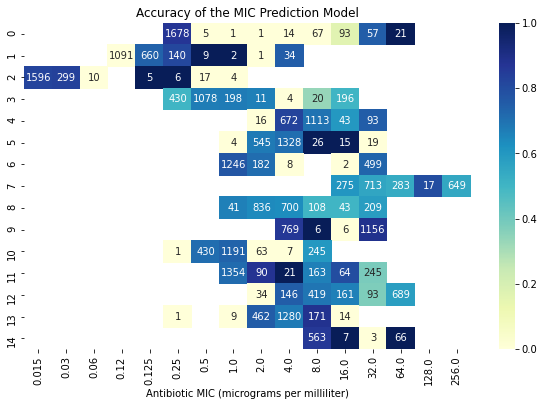

In [596]:
# Accuracy within ±1 2-fold dilution step of the laboratory-derived MIC

# Accuracy DataFrame
accuracies_dframe = accuracies[0].append(accuracies[1:15], sort=False, ignore_index=True)

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Accuracy of the MIC Prediction Model")

# Heatmap showing the amount of genomes with the same MIC for each MIC, by antibiotic
sns.heatmap(data=accuracies_dframe,annot=amounts_dframe,fmt='.4g',cmap="YlGnBu")

# Add label for horizontal axis
plt.xlabel("Antibiotic MIC (micrograms per milliliter)")